# TO Be, Or Not to Be

Build the classification models to determine the players upon Shakespeare play data set

In [152]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

### Load the Data Set into Pandas 

Import the csv files into Pandas Data Frame

Data retrieved from: https://www.kaggle.com/kingburrito666/shakespeare-plays

In [153]:
title = "                                         Shakespeare Data.csv"                              
print(title)
data_raw = pd.read_csv("DATA.csv")
data_raw

                                         Shakespeare Data.csv


,Dataline,Play,PlayerLinenumber,ActSceneLine,Player,PlayerLine
0,1,Henry IV,NaN,NaN,NaN,ACT I
1,2,Henry IV,NaN,NaN,NaN,SCENE I. London. The palace.
2,3,Henry IV,NaN,NaN,NaN,"Enter KING HENRY, LORD JOHN OF LANCASTER, the ..."
3,4,Henry IV,1.0,1.1.1,KING HENRY IV,"So shaken as we are, so wan with care,"
4,5,Henry IV,1.0,1.1.2,KING HENRY IV,"Find we a time for frighted peace to pant,"
...,...,...,...,...,...,...
111391,111392,A Winters Tale,38.0,5.3.180,LEONTES,"Lead us from hence, where we may leisurely"
111392,111393,A Winters Tale,38.0,5.3.181,LEONTES,Each one demand an answer to his part
111393,111394,A Winters Tale,38.0,5.3.182,LEONTES,Perform'd in this wide gap of time since first
111394,111395,A Winters Tale,38.0,5.3.183,LEONTES,We were dissever'd: hastily lead away.


## Data Preparation 

Clean all NaN value from Player coulums and re-organize the data frame.

Our target classification model is Player so Player attribute value, NaN, is uesless to us.

In [154]:
data = data_raw.dropna()
data = data[['Play', 'PlayerLinenumber', 'ActSceneLine', 'Player', 'PlayerLine']]

In [155]:
data

,Play,PlayerLinenumber,ActSceneLine,Player,PlayerLine
3,Henry IV,1.0,1.1.1,KING HENRY IV,"So shaken as we are, so wan with care,"
4,Henry IV,1.0,1.1.2,KING HENRY IV,"Find we a time for frighted peace to pant,"
5,Henry IV,1.0,1.1.3,KING HENRY IV,And breathe short-winded accents of new broils
6,Henry IV,1.0,1.1.4,KING HENRY IV,To be commenced in strands afar remote.
7,Henry IV,1.0,1.1.5,KING HENRY IV,No more the thirsty entrance of this soil
...,...,...,...,...,...
111390,A Winters Tale,38.0,5.3.179,LEONTES,"Is troth-plight to your daughter. Good Paulina,"
111391,A Winters Tale,38.0,5.3.180,LEONTES,"Lead us from hence, where we may leisurely"
111392,A Winters Tale,38.0,5.3.181,LEONTES,Each one demand an answer to his part
111393,A Winters Tale,38.0,5.3.182,LEONTES,Perform'd in this wide gap of time since first


### Visualization
Use word cloud to check the word frequency

In [167]:
data_list = data['Player'].dropna().to_string().replace(" ","").split('\n')

for index, word in enumerate(data):
    data_list[index] = "".join(filter(lambda x: not x.isdigit(), word))


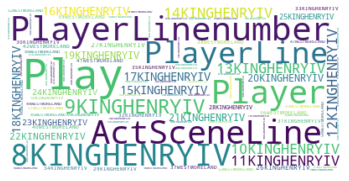

In [168]:
text = ' '.join(data_list)
wordcloud = WordCloud(background_color ='white', collocations=False).generate(text)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

## Exploratory Data Analysis
#### Feature Engineering: Extraction
ActSceneLine attribute value, such as 5.3.180, is very little helpful to us. Hence, as a feature engineer, we could derive more features from ActSceneLine.

Instead of ActSceneLine, it should be categorized as three different data types: Act, Scene, and Line.

For example, ActScenenLine → (Act, Scene, Line); (5.3.180) → (5, 3, 180)

In [96]:
new = data["ActSceneLine"].str.split(".", n = 2, expand = True)
data["Act"] = pd.to_numeric(new[0])
data["Scene"] = pd.to_numeric(new[1])
data["Line"] = pd.to_numeric(new[2])
data = data[["Play", "PlayerLinenumber", "Act", "Scene", "Line", "Player", "PlayerLine"]]

In [97]:
data

,Play,PlayerLinenumber,Act,Scene,Line,Player,PlayerLine
3,Henry IV,1.0,1,1,1,KING HENRY IV,"So shaken as we are, so wan with care,"
4,Henry IV,1.0,1,1,2,KING HENRY IV,"Find we a time for frighted peace to pant,"
5,Henry IV,1.0,1,1,3,KING HENRY IV,And breathe short-winded accents of new broils
6,Henry IV,1.0,1,1,4,KING HENRY IV,To be commenced in strands afar remote.
7,Henry IV,1.0,1,1,5,KING HENRY IV,No more the thirsty entrance of this soil
...,...,...,...,...,...,...,...
111390,A Winters Tale,38.0,5,3,179,LEONTES,"Is troth-plight to your daughter. Good Paulina,"
111391,A Winters Tale,38.0,5,3,180,LEONTES,"Lead us from hence, where we may leisurely"
111392,A Winters Tale,38.0,5,3,181,LEONTES,Each one demand an answer to his part
111393,A Winters Tale,38.0,5,3,182,LEONTES,Perform'd in this wide gap of time since first


#### Feature Engineering: Transformation 
For the deeper data analysis, we have to come up with a numerical representation for each word of Player. 
One-hot encoding could utilize the Player feature in a new way and also makes it easier to read.

In [98]:
data = pd.get_dummies(data, columns=['Play'])

In [99]:
data

,PlayerLinenumber,Act,Scene,Line,Player,PlayerLine,Play_A Comedy of Errors,Play_A Midsummer nights dream,Play_A Winters Tale,Play_Alls well that ends well,...,Play_Richard III,Play_Romeo and Juliet,Play_Taming of the Shrew,Play_The Tempest,Play_Timon of Athens,Play_Titus Andronicus,Play_Troilus and Cressida,Play_Twelfth Night,Play_Two Gentlemen of Verona,Play_macbeth
3,1.0,1,1,1,KING HENRY IV,"So shaken as we are, so wan with care,",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1.0,1,1,2,KING HENRY IV,"Find we a time for frighted peace to pant,",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1.0,1,1,3,KING HENRY IV,And breathe short-winded accents of new broils,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1.0,1,1,4,KING HENRY IV,To be commenced in strands afar remote.,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1.0,1,1,5,KING HENRY IV,No more the thirsty entrance of this soil,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111390,38.0,5,3,179,LEONTES,"Is troth-plight to your daughter. Good Paulina,",0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
111391,38.0,5,3,180,LEONTES,"Lead us from hence, where we may leisurely",0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
111392,38.0,5,3,181,LEONTES,Each one demand an answer to his part,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
111393,38.0,5,3,182,LEONTES,Perform'd in this wide gap of time since first,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


### Build a Classification Model: Naive Bayes

Make a naive assumption that features such as PlayerLinenumber, Act, Scene, and Line are independent of each other, and also makes Player as my dependent variable.

P(Player/ PlayerLinenumber & Act & Scene & Line)

target = data.Player
data = pd.get_dummies(data, columns=["Player"])
inputs = data.drop('Player', axis = 'columns')

In [ ]:
dummies = pd.get_dummies(inputs.Act)
dummies.head(3)

In [ ]:
inputs = pd.concat([inputs, dummies], axis = 'columns')
inputs.head(3)

In [101]:
inputs = data.drop('PlayerLine', axis = 'columns')
inputs.drop('Act', axis = 'columns', inplace = True)
inputs.head(3)

,PlayerLinenumber,Scene,Line,Play_A Comedy of Errors,Play_A Midsummer nights dream,Play_A Winters Tale,Play_Alls well that ends well,Play_Antony and Cleopatra,Play_As you like it,Play_Coriolanus,...,Player_Wife,Player_YORK,Player_YOUNG CLIFFORD,Player_YOUNG SIWARD,Player_Young LUCIUS,Player_Young MARCIUS,Player_of BUCKINGHAM,Player_of King Henry VI,Player_of Prince Edward,Player_of young Princes
3,1.0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1.0,1,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1.0,1,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Check if there's any NaN attribute value under the data type

In [102]:
inputs.columns[inputs.isna().any()]

Index([], dtype='object')

So now we can ensrue that there is NaN under 'Scene' and 'Line'

We replace NaN value with the mean.

In [103]:
inputs.Scene = inputs.Scene.fillna(inputs.Scene.mean())
inputs.Line = inputs.Line.fillna(inputs.Line.mean())

Now let's test and train our data set with 20% and 80% ratio

In [104]:
X_train, X_test, y_train, y_test = train_test_split(inputs, target, test_size = 0.2)

Let's see how big is our train and test data set

In [105]:
len(X_train)

84121

In [106]:
len(X_test)

21031

In [107]:
len(inputs)

105152

In [108]:
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [109]:
model.score(X_test, y_test)

0.9976701060339499

As you can see, the accuracy of our classification model is 99.76%  !!

## Conclusion 

 I load Shakespeare data set into pandas. Then I start cleaning the data by removing all the NaN attribute value since NaN is useless to the accuracy prediction and it would cause errors in model() function. As a feature Engineer, I use extration ideas to separate ActSceneLine into three differnet values which is more helpful to our prediction. I also use one-hot encoding to convert the string into float so that when I use model.fit() function, I don't need to convert the string to float for calculation. Finally, I use Naive Bayes as the classification model to determine "Player" by using PlayerLinenumber, Act, Scene, and Line as features. I achieve 99.76% accuracy rate.